<a href="https://colab.research.google.com/github/salemprakash/FoDS-Fall-2025-26/blob/main/Module%202%20Sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Install and Load the Extension.
!pip -q install "ipython-sql>=0.5.0" "prettytable<3.10"
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [11]:
#Connect to a Database
%sql sqlite:////content/mydb2.db
%config SqlMagic.style = 'PLAIN_COLUMNS'

In [17]:
%%sql
CREATE TABLE IF NOT EXISTS employees (
  emp_id    INTEGER PRIMARY KEY,
  name      TEXT NOT NULL,
  dept      TEXT,
  salary    INTEGER
);

 * sqlite:////content/mydb2.db
Done.


[]

In [18]:
%%sql
INSERT INTO employees VALUES
(1,'Alice','Data Science',90000),
(2,'Bob','Analytics',78000),
(3,'Carol','Engineering',105000),
(4,'David','Analytics',82000),
(5,'Eve','Data Science',96000);

 * sqlite:////content/mydb2.db
5 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM employees ORDER BY emp_id;

 * sqlite:////content/mydb2.db
Done.


emp_id,name,dept,salary
1,Alice,Data Science,90000
2,Bob,Analytics,78000
3,Carol,Engineering,105000
4,David,Analytics,82000
5,Eve,Data Science,96000


#Basic Statistics with SQL

In [ ]:
#Create the table
%%sql
CREATE TABLE employees (
    salary INT,
    name VARCHAR(50)
);




In [ ]:
#Insert data into the table
%%sql
INSERT INTO employees (salary, name) VALUES (1000, 'Amit');
INSERT INTO employees (salary, name) VALUES (2000, 'Nisha');
INSERT INTO employees (salary, name) VALUES (3000, 'Yogesh');
INSERT INTO employees (salary, name) VALUES (4000, 'Puja');
INSERT INTO employees (salary, name) VALUES (9000, 'Ram');
INSERT INTO employees (salary, name) VALUES (7000, 'Husain');
INSERT INTO employees (salary, name) VALUES (8000, 'Risha');
INSERT INTO employees (salary, name) VALUES (5000, 'Anil');
INSERT INTO employees (salary, name) VALUES (10000, 'Kumar');
INSERT INTO employees (salary, name) VALUES (6000, 'Shiv');



In [ ]:
%%sql
Select * from employees;


In [ ]:
#Mean
%%sql
SELECT Avg(salary) as MEAN FROM   employees;

In [ ]:
#Mode
%%sql
SELECT salary
FROM employees
GROUP BY salary
ORDER BY COUNT(*) DESC
LIMIT 1;



In [ ]:
#Median - Suitable for SQL Lite
%%sql

WITH ordered AS (
  SELECT
    salary,
    ROW_NUMBER() OVER (ORDER BY salary) AS rn,
    COUNT(*) OVER () AS cnt
  FROM employees
  WHERE salary IS NOT NULL
)
SELECT AVG(salary) AS median_salary
FROM ordered
WHERE rn IN ((cnt + 1)/2, (cnt + 2)/2);

In [ ]:
#Median Suitable only in SQL SERVER
'''  #This syntax will only work in MS SQL SERVER not in SQL Lite
%%sql
SET @rindex := -1;
SELECT AVG(m.sal) FROM
	(SELECT @rindex:=@rindex + 1 AS rowindex, employees.salary AS sal
	FROM employees
	ORDER BY employees.salary) AS m
WHERE
m.rowindex IN (FLOOR(@rindex / 2) , CEIL(@rindex / 2));
'''

#Data Munging with SQL

In [ ]:
#UPPER
%%sql
SELECT UPPER(name) AS name FROM employees;

In [ ]:
#LOWER
%%sql
SELECT LOWER(name) AS name FROM employees;

In [ ]:
#TRIM
%%sql
SELECT TRIM(name) AS name FROM employees;

In [ ]:
#LTRIM
%%sql
SELECT LTRIM(name) AS name FROM employees;

In [ ]:
#RTRIM
%%sql
SELECT RTRIM(name) AS name FROM employees;

In [ ]:
#RIGHT - 2 charcter from right
%%sql
SELECT SUBSTR(name, -2) AS name FROM employees;

In [ ]:
#LEFT - For first 2 character from left name, starting position, ending position
%%sql
SELECT SUBSTR(name, 1, 2) AS name FROM employees;

In [ ]:
#REPLACE
%%sql
SELECT REPLACE(name, 'a', 'A') AS name FROM employees;

#Joins
* In SQL, joins are commands that are used to combine rows from two or more tables.
* These tables are combined based on a related column between those tables. Inner, left, right, and full are four basic types of SQL joins.
* Venn diagram is the easiest way to explain the difference between these four types.
* The result of joining two tables can be represented by the following Venn diagram

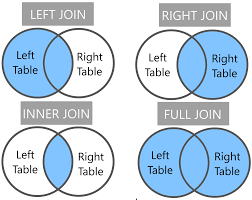




In [12]:
%%sql
--Emp Table
CREATE TABLE Emp (
    ID INT PRIMARY KEY,
    STATE VARCHAR(2)
);


 * sqlite:////content/mydb2.db
(sqlite3.OperationalError) table Emp already exists
[SQL: --Emp Table
CREATE TABLE Emp (
    ID INT PRIMARY KEY,
    STATE VARCHAR(2)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [13]:
%%sql
--Insert in Emp table
INSERT INTO Emp (ID, STATE) VALUES
(10, 'AB'),
(11, 'AC'),
(12, 'AD');


 * sqlite:////content/mydb2.db
(sqlite3.IntegrityError) UNIQUE constraint failed: Emp.ID
[SQL: --Insert in Emp table
INSERT INTO Emp (ID, STATE) VALUES
(10, 'AB'),
(11, 'AC'),
(12, 'AD');]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


In [14]:
%%sql
--Dept Table
CREATE TABLE Dept (
    ID INT PRIMARY KEY,
    BRANCH VARCHAR(20)
);

--Insert into Dept Table
INSERT INTO Dept (ID, BRANCH) VALUES
(11, 'Computer'),
(12, 'Civil'),
(13, 'Mech');


 * sqlite:////content/mydb2.db
(sqlite3.OperationalError) table Dept already exists
[SQL: --Dept Table
CREATE TABLE Dept (
    ID INT PRIMARY KEY,
    BRANCH VARCHAR(20)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [15]:
%%sql
SELECT * from Emp;



 * sqlite:////content/mydb2.db
Done.


ID,STATE
10,AB
11,AC
12,AD


In [ ]:
%%sql
SELECT * from Dept;

 * sqlite:////content/mydb2.db
Done.


ID,BRANCH
11,Computer
12,Civil
13,Mech


In [ ]:
#Inner Join
%%sql
SELECT *FROM Emp inner join Dept on Emp.ID = Dept.ID;


 * sqlite:////content/mydb2.db
Done.


ID,STATE,ID_1,BRANCH
11,AC,11,Computer
12,AD,12,Civil


In [ ]:
#Left Outer Join
%%sql
SELECT *FROM Emp left outer join Dept on Emp.ID = Dept.ID;


 * sqlite:////content/mydb2.db
Done.


ID,STATE,ID_1,BRANCH
10,AB,None,None
11,AC,11,Computer
12,AD,12,Civil


In [ ]:
#Right Outer Join - This is not supported here and will support in MS Sql Server
%%sql
SELECT * FROM Emp right outer join Dept on Emp.ID = Dept.ID;


 * sqlite:////content/mydb2.db
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT * FROM Emp right outer join Dept on Emp.ID = Dept.ID;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
#Full Outer Join - This is not supported here and will support in MS Sql Server
%%sql
SELECT *FROM Emp full outer join Dept on Emp.ID = Dept.ID;

 * sqlite:////content/mydb2.db
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT *FROM Emp full outer join Dept on Emp.ID = Dept.ID;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
#Cross Join
%%sql
SELECT *FROM Emp cross join Dept;

 * sqlite:////content/mydb2.db
Done.


ID,STATE,ID_1,BRANCH
10,AB,11,Computer
10,AB,12,Civil
10,AB,13,Mech
11,AC,11,Computer
11,AC,12,Civil
11,AC,13,Mech
12,AD,11,Computer
12,AD,12,Civil
12,AD,13,Mech


#Aggregation

In [19]:
#COUNT
%%sql
SELECT COUNT(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


COUNT(SALARY)
5


In [21]:
#AVERAGE
%%sql
SELECT AVG(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


AVG(SALARY)
90200.0


In [22]:
#SUM
%%sql
SELECT SUM(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


SUM(SALARY)
451000


In [23]:
#MIN
%%sql
SELECT MIN(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


MIN(SALARY)
78000


In [24]:
#MAX
%%sql
SELECT MAX(SALARY) FROM employees;

 * sqlite:////content/mydb2.db
Done.


MAX(SALARY)
105000


#Filtering

In [25]:
%%sql
--worker table
CREATE TABLE workers (
    ENAME VARCHAR(50),
    EID INT PRIMARY KEY,
    SALARY DECIMAL(10, 2),
    DEPTID INT,
    DEPTNAME VARCHAR(50)
);

 * sqlite:////content/mydb2.db
Done.


[]

In [26]:
%%sql
--insert 6 records into workers table
INSERT INTO workers (ENAME, EID, SALARY, DEPTID, DEPTNAME) VALUES
('John', 11, 30000.00, 301, 'Workshop'),
('Jerry', 15, 35000.00, 305, 'Testing'),
('Niya', 38, 45000.00, 308, 'HR'),
('Alice', 18, 45000.00, 305, 'Testing'),
('Tom', 24, 50000.00, 301, 'Workshop'),
('Bobby', 17, 58000.00, 308, 'HR');

 * sqlite:////content/mydb2.db
6 rows affected.


[]

In [27]:
%%sql
SELECT * from workers;

 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
John,11,30000,301,Workshop
Jerry,15,35000,305,Testing
Niya,38,45000,308,HR
Alice,18,45000,305,Testing
Tom,24,50000,301,Workshop
Bobby,17,58000,308,HR


In [28]:
#Syntax to filter data using WHERE - Equal Operator
%%sql
SELECT * FROM workers WHERE DEPTNAME='HR';

 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
Niya,38,45000,308,HR
Bobby,17,58000,308,HR


In [29]:
#Relational
%%sql
SELECT * FROM workers WHERE SALARY<=47000;

 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
John,11,30000,301,Workshop
Jerry,15,35000,305,Testing
Niya,38,45000,308,HR
Alice,18,45000,305,Testing


In [39]:
#AND Operator
%%sql
SELECT * FROM workers WHERE SALARY<=47000 AND DEPTNAME='HR';

 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
Niya,38,45000,308,HR


In [31]:
#OR
%%sql
SELECT * FROM workers WHERE SALARY<=36000 OR DEPTNAME='HR';

 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
John,11,30000,301,Workshop
Jerry,15,35000,305,Testing
Niya,38,45000,308,HR
Bobby,17,58000,308,HR


In [32]:
#Like
%%sql
SELECT ENAME FROM workers WHERE ENAME like '%y';

 * sqlite:////content/mydb2.db
Done.


ENAME
Jerry
Bobby


In [33]:
#Like - Wild card Character _ - Underscore multiple and ? - Question mark Single character
%%sql
SELECT SALARY FROM workers WHERE SALARY like '_5%';

 * sqlite:////content/mydb2.db
Done.


SALARY
35000
45000
45000


In [35]:
#IN Operator
%%sql
SELECT * FROM workers WHERE DEPTNAME IN('Testing', 'Workshop');


 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
John,11,30000,301,Workshop
Jerry,15,35000,305,Testing
Alice,18,45000,305,Testing
Tom,24,50000,301,Workshop


In [36]:
#NOT IN Operator
%%sql
SELECT * FROM workers WHERE DEPTNAME NOT IN ('Testing', 'Workshop');


 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
Niya,38,45000,308,HR
Bobby,17,58000,308,HR


In [37]:
#Sub Query
%%sql
SELECT * FROM workers WHERE EID IN (select EID FROM workers WHERE DEPTNAME='HR' OR SALARY>=40000);


 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
Bobby,17,58000,308,HR
Alice,18,45000,305,Testing
Tom,24,50000,301,Workshop
Niya,38,45000,308,HR


In [40]:
#Between
%%sql
SELECT * FROM workers WHERE SALARY BETWEEN 30000 and 45000;

 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
John,11,30000,301,Workshop
Jerry,15,35000,305,Testing
Niya,38,45000,308,HR
Alice,18,45000,305,Testing


In [41]:
#NOT Between
%%sql
SELECT * FROM workers WHERE SALARY NOT BETWEEN 30000 and 45000;

 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
Tom,24,50000,301,Workshop
Bobby,17,58000,308,HR


#Window Functions and Ordered Data


In [42]:
#
%%sql
-- Step 1: Create the table
CREATE TABLE workers (
    ENAME VARCHAR(50),
    EID INT,
    SALARY INT,
    DEPTID INT,
    DEPTNAME VARCHAR(50)
);


 * sqlite:////content/mydb2.db
(sqlite3.OperationalError) table workers already exists
[SQL: -- Step 1: Create the table
CREATE TABLE workers (
    ENAME VARCHAR(50),
    EID INT,
    SALARY INT,
    DEPTID INT,
    DEPTNAME VARCHAR(50)
);]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [45]:
#
%%sql
-- Step 2: Insert data into the table
INSERT INTO workers (ENAME, EID, SALARY, DEPTID, DEPTNAME) VALUES
('Reyon', 16, 30000, 305, 'Testing'),
('Bob', 22, 51000, 301, 'Workshop');

 * sqlite:////content/mydb2.db
2 rows affected.


[]

In [46]:
#
%%sql
SELECT * from workers;


 * sqlite:////content/mydb2.db
Done.


ENAME,EID,SALARY,DEPTID,DEPTNAME
John,11,30000,301,Workshop
Jerry,15,35000,305,Testing
Niya,38,45000,308,HR
Alice,18,45000,305,Testing
Tom,24,50000,301,Workshop
Bobby,17,58000,308,HR
Reyon,16,30000,305,Testing
Bob,22,51000,301,Workshop


In [47]:
#RANK
%%sql
SELECT RANK()
	OVER (PARTITION BY 	DEPTNAME ORDER BY SALARY DESC) 	AS 	DEPT_RANK,
	DEPTNAME,
	DEPTID, SALARY, ENAME, EID FROM workers;

 * sqlite:////content/mydb2.db
Done.


DEPT_RANK,DEPTNAME,DEPTID,SALARY,ENAME,EID
1,HR,308,58000,Bobby,17
2,HR,308,45000,Niya,38
1,Testing,305,45000,Alice,18
2,Testing,305,35000,Jerry,15
3,Testing,305,30000,Reyon,16
1,Workshop,301,51000,Bob,22
2,Workshop,301,50000,Tom,24
3,Workshop,301,30000,John,11


In [48]:
#RANK - EXCLUDE PARTITION BY
%%sql
	SELECT RANK() OVER (ORDER BY SALARY DESC) AS DEPT_RANK,
  DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


DEPT_RANK,DEPTNAME,DEPTID,SALARY,ENAME,EID
1,HR,308,58000,Bobby,17
2,Workshop,301,51000,Bob,22
3,Workshop,301,50000,Tom,24
4,HR,308,45000,Niya,38
4,Testing,305,45000,Alice,18
6,Testing,305,35000,Jerry,15
7,Workshop,301,30000,John,11
7,Testing,305,30000,Reyon,16


In [49]:
#RANK - TOP SALARY ON THEIR DEPARTMENT
%%sql
SELECT DEPTNAME, DEPTID, SALARY, ENAME, EID,
SALARY / MAX(SALARY) OVER
(PARTITION BY DEPTNAME ORDER BY SALARY DESC) AS SMATRIX  FROM workers ORDER BY DEPTNAME


 * sqlite:////content/mydb2.db
Done.


DEPTNAME,DEPTID,SALARY,ENAME,EID,SMATRIX
HR,308,58000,Bobby,17,1
HR,308,45000,Niya,38,0
Testing,305,45000,Alice,18,1
Testing,305,35000,Jerry,15,0
Testing,305,30000,Reyon,16,0
Workshop,301,51000,Bob,22,1
Workshop,301,50000,Tom,24,0
Workshop,301,30000,John,11,0


In [50]:
#PERCENT_RANK
%%sql
SELECT PERCENT_RANK() OVER
(PARTITION BY DEPTNAME ORDER BY SALARY DESC) AS DEPT_RANK, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


DEPT_RANK,DEPTNAME,DEPTID,SALARY,ENAME,EID
0.0,HR,308,58000,Bobby,17
1.0,HR,308,45000,Niya,38
0.0,Testing,305,45000,Alice,18
0.5,Testing,305,35000,Jerry,15
1.0,Testing,305,30000,Reyon,16
0.0,Workshop,301,51000,Bob,22
0.5,Workshop,301,50000,Tom,24
1.0,Workshop,301,30000,John,11


In [ ]:
#PERCENT_RANK -EXCLUDES PARTITION BY
%%sql
SELECT PERCENT_RANK() OVER
(ORDER BY SALARY DESC) AS DEPT_RANK, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;

In [51]:
#DENSE_RANK
%%sql
SELECT DENSE_RANK() OVER
	(ORDER BY SALARY DESC) AS DEPT__DENSE_RANK,
	DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


DEPT__DENSE_RANK,DEPTNAME,DEPTID,SALARY,ENAME,EID
1,HR,308,58000,Bobby,17
2,Workshop,301,51000,Bob,22
3,Workshop,301,50000,Tom,24
4,HR,308,45000,Niya,38
4,Testing,305,45000,Alice,18
5,Testing,305,35000,Jerry,15
6,Workshop,301,30000,John,11
6,Testing,305,30000,Reyon,16


In [52]:
#NTILE
%%sql
SELECT ENAME, EID, DEPTID, DEPTNAME, SALARY, NTILE(3)
OVER (PARTITION BY DEPTNAME ORDER BY SALARY) AS BUCKETS FROM workers;


 * sqlite:////content/mydb2.db
Done.


ENAME,EID,DEPTID,DEPTNAME,SALARY,BUCKETS
Niya,38,308,HR,45000,1
Bobby,17,308,HR,58000,2
Reyon,16,305,Testing,30000,1
Jerry,15,305,Testing,35000,2
Alice,18,305,Testing,45000,3
John,11,301,Workshop,30000,1
Tom,24,301,Workshop,50000,2
Bob,22,301,Workshop,51000,3


In [53]:
#NTILE
%%sql
SELECT ENAME, EID, DEPTID, DEPTNAME, SALARY, NTILE(3) OVER (ORDER BY SALARY) AS BUCKETS FROM workers;

 * sqlite:////content/mydb2.db
Done.


ENAME,EID,DEPTID,DEPTNAME,SALARY,BUCKETS
John,11,301,Workshop,30000,1
Reyon,16,305,Testing,30000,1
Jerry,15,305,Testing,35000,1
Niya,38,308,HR,45000,2
Alice,18,305,Testing,45000,2
Tom,24,301,Workshop,50000,2
Bob,22,301,Workshop,51000,3
Bobby,17,308,HR,58000,3


In [54]:
#CUME_DIST
%%sql
SELECT ENAME, EID, DEPTID, DEPTNAME, SALARY, CUME_DIST() OVER (PARTITION BY DEPTNAME ORDER BY SALARY) AS CUME_DIST_VALUE FROM workers;


 * sqlite:////content/mydb2.db
Done.


ENAME,EID,DEPTID,DEPTNAME,SALARY,CUME_DIST_VALUE
Niya,38,308,HR,45000,0.5
Bobby,17,308,HR,58000,1.0
Reyon,16,305,Testing,30000,0.3333333333333333
Jerry,15,305,Testing,35000,0.6666666666666666
Alice,18,305,Testing,45000,1.0
John,11,301,Workshop,30000,0.3333333333333333
Tom,24,301,Workshop,50000,0.6666666666666666
Bob,22,301,Workshop,51000,1.0


In [55]:
#ROW_NUMBER
%%sql
SELECT ROW_NUMBER() OVER (PARTITION BY DEPTNAME ORDER BY SALARY DESC) AS ROW_NUM, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


ROW_NUM,DEPTNAME,DEPTID,SALARY,ENAME,EID
1,HR,308,58000,Bobby,17
2,HR,308,45000,Niya,38
1,Testing,305,45000,Alice,18
2,Testing,305,35000,Jerry,15
3,Testing,305,30000,Reyon,16
1,Workshop,301,51000,Bob,22
2,Workshop,301,50000,Tom,24
3,Workshop,301,30000,John,11


In [56]:
#AVG
%%sql
SELECT AVG(SALARY) OVER (PARTITION BY DEPTNAME) AS AVG_SALARY, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


AVG_SALARY,DEPTNAME,DEPTID,SALARY,ENAME,EID
51500.0,HR,308,45000,Niya,38
51500.0,HR,308,58000,Bobby,17
36666.666666666664,Testing,305,35000,Jerry,15
36666.666666666664,Testing,305,45000,Alice,18
36666.666666666664,Testing,305,30000,Reyon,16
43666.666666666664,Workshop,301,30000,John,11
43666.666666666664,Workshop,301,50000,Tom,24
43666.666666666664,Workshop,301,51000,Bob,22


In [57]:
#AVG - ORDER BY
%%sql
SELECT AVG(SALARY) OVER (PARTITION BY DEPTNAME ORDER BY SALARY DESC) AS AVG_SALARY, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


AVG_SALARY,DEPTNAME,DEPTID,SALARY,ENAME,EID
58000.0,HR,308,58000,Bobby,17
51500.0,HR,308,45000,Niya,38
45000.0,Testing,305,45000,Alice,18
40000.0,Testing,305,35000,Jerry,15
36666.666666666664,Testing,305,30000,Reyon,16
51000.0,Workshop,301,51000,Bob,22
50500.0,Workshop,301,50000,Tom,24
43666.666666666664,Workshop,301,30000,John,11


In [58]:
#SUM
%%sql
SELECT SUM(SALARY) OVER (PARTITION BY DEPTNAME) AS SUM_SALARY, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


SUM_SALARY,DEPTNAME,DEPTID,SALARY,ENAME,EID
103000,HR,308,45000,Niya,38
103000,HR,308,58000,Bobby,17
110000,Testing,305,35000,Jerry,15
110000,Testing,305,45000,Alice,18
110000,Testing,305,30000,Reyon,16
131000,Workshop,301,30000,John,11
131000,Workshop,301,50000,Tom,24
131000,Workshop,301,51000,Bob,22


In [59]:
#SUM - ORDER BY
%%sql
SELECT SUM(SALARY) OVER (PARTITION BY DEPTNAME ORDER BY SALARY DESC) AS SUM_SALARY, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


SUM_SALARY,DEPTNAME,DEPTID,SALARY,ENAME,EID
58000,HR,308,58000,Bobby,17
103000,HR,308,45000,Niya,38
45000,Testing,305,45000,Alice,18
80000,Testing,305,35000,Jerry,15
110000,Testing,305,30000,Reyon,16
51000,Workshop,301,51000,Bob,22
101000,Workshop,301,50000,Tom,24
131000,Workshop,301,30000,John,11


In [60]:
#COUNT
%%sql
SELECT COUNT(ENAME) OVER (PARTITION BY DEPTNAME) AS COUNT_ENAME, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


COUNT_ENAME,DEPTNAME,DEPTID,SALARY,ENAME,EID
2,HR,308,45000,Niya,38
2,HR,308,58000,Bobby,17
3,Testing,305,35000,Jerry,15
3,Testing,305,45000,Alice,18
3,Testing,305,30000,Reyon,16
3,Workshop,301,30000,John,11
3,Workshop,301,50000,Tom,24
3,Workshop,301,51000,Bob,22


In [61]:
#MAX
%%sql
SELECT DEPTNAME, DEPTID, SALARY, ENAME, EID, MAX(SALARY) OVER (PARTITION BY DEPTNAME) AS MAX_SAL, MIN(SALARY) OVER (PARTITION BY DEPTNAME) AS MIN_SAL FROM workers;


 * sqlite:////content/mydb2.db
Done.


DEPTNAME,DEPTID,SALARY,ENAME,EID,MAX_SAL,MIN_SAL
HR,308,45000,Niya,38,58000,45000
HR,308,58000,Bobby,17,58000,45000
Testing,305,35000,Jerry,15,45000,30000
Testing,305,45000,Alice,18,45000,30000
Testing,305,30000,Reyon,16,45000,30000
Workshop,301,30000,John,11,51000,30000
Workshop,301,50000,Tom,24,51000,30000
Workshop,301,51000,Bob,22,51000,30000


In [62]:
#LEAD
%%sql
SELECT ENAME, EID, DEPTID, DEPTNAME, SALARY, LEAD(SALARY) OVER (PARTITION BY DEPTNAME ORDER BY SALARY) AS NEXT_PERSON_SALARY FROM workers;


 * sqlite:////content/mydb2.db
Done.


ENAME,EID,DEPTID,DEPTNAME,SALARY,NEXT_PERSON_SALARY
Niya,38,308,HR,45000,58000
Bobby,17,308,HR,58000,None
Reyon,16,305,Testing,30000,35000
Jerry,15,305,Testing,35000,45000
Alice,18,305,Testing,45000,None
John,11,301,Workshop,30000,50000
Tom,24,301,Workshop,50000,51000
Bob,22,301,Workshop,51000,None


In [63]:
#LEAD
%%sql
SELECT ENAME, EID, DEPTID, DEPTNAME, SALARY, LEAD(SALARY) OVER (PARTITION BY DEPTNAME ORDER BY SALARY)-SALARY AS SALARY_DIFFERENCE FROM workers;


 * sqlite:////content/mydb2.db
Done.


ENAME,EID,DEPTID,DEPTNAME,SALARY,SALARY_DIFFERENCE
Niya,38,308,HR,45000,13000
Bobby,17,308,HR,58000,None
Reyon,16,305,Testing,30000,5000
Jerry,15,305,Testing,35000,10000
Alice,18,305,Testing,45000,None
John,11,301,Workshop,30000,20000
Tom,24,301,Workshop,50000,1000
Bob,22,301,Workshop,51000,None


In [64]:
#FIRST_VALUE
%%sql
SELECT FIRST_VALUE(SALARY) OVER (PARTITION BY DEPTNAME ORDER BY SALARY DESC) AS FIRST_ROW, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


FIRST_ROW,DEPTNAME,DEPTID,SALARY,ENAME,EID
58000,HR,308,58000,Bobby,17
58000,HR,308,45000,Niya,38
45000,Testing,305,45000,Alice,18
45000,Testing,305,35000,Jerry,15
45000,Testing,305,30000,Reyon,16
51000,Workshop,301,51000,Bob,22
51000,Workshop,301,50000,Tom,24
51000,Workshop,301,30000,John,11


In [65]:
#LAST_VALUE
%%sql
SELECT LAST_VALUE(SALARY) OVER (PARTITION BY DEPTNAME ORDER BY SALARY DESC) AS LAST_ROW, DEPTNAME, DEPTID, SALARY, ENAME, EID FROM workers;


 * sqlite:////content/mydb2.db
Done.


LAST_ROW,DEPTNAME,DEPTID,SALARY,ENAME,EID
58000,HR,308,58000,Bobby,17
45000,HR,308,45000,Niya,38
45000,Testing,305,45000,Alice,18
35000,Testing,305,35000,Jerry,15
30000,Testing,305,30000,Reyon,16
51000,Workshop,301,51000,Bob,22
50000,Workshop,301,50000,Tom,24
30000,Workshop,301,30000,John,11


In [66]:
#LAG
%%sql
SELECT ENAME, EID, DEPTID, DEPTNAME, SALARY, LAG(SALARY) OVER (PARTITION BY DEPTNAME ORDER BY SALARY) AS PREVIOUS_PERSON_SALARY FROM workers;


 * sqlite:////content/mydb2.db
Done.


ENAME,EID,DEPTID,DEPTNAME,SALARY,PREVIOUS_PERSON_SALARY
Niya,38,308,HR,45000,None
Bobby,17,308,HR,58000,45000
Reyon,16,305,Testing,30000,None
Jerry,15,305,Testing,35000,30000
Alice,18,305,Testing,45000,35000
John,11,301,Workshop,30000,None
Tom,24,301,Workshop,50000,30000
Bob,22,301,Workshop,51000,50000


#Preparing Data for Analytics Tool

In [ ]:
%%sql
--SALES TABLE
CREATE TABLE sales (
    sale_no INT PRIMARY KEY,
    product_id INT,
    quantity INT,
    price INT,
    customer_name VARCHAR(50)
);


 * sqlite:////content/mydb2.db
Done.


[]

In [ ]:
#INSERT RECORD INTO SALES TABLE
%%sql
INSERT INTO sales (sale_no, product_id, quantity, price, customer_name) VALUES
(5001, 3, 4, 21000, 'John'),
(5002, 11, NULL, 17000, 'Anna'),
(5003, 94, 10, 105000, 'Tom'),
(5004, 86, 8, 27000, 'Nora'),
(5005, 88, 18, 8000, 'Tom');



 * sqlite:////content/mydb2.db
5 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM SALES;

 * sqlite:////content/mydb2.db
Done.


sale_no,product_id,quantity,price,customer_name
5001,3,4,21000,John
5002,11,None,17000,Anna
5003,94,10,105000,Tom
5004,86,8,27000,Nora
5005,88,18,8000,Tom


In [ ]:
#CASE
%%sql
SELECT *,
	CASE	 WHEN quantity >= 10 THEN 'More'
			WHEN quantity >= 6 THEN 'Avg'
			ELSE 'Less'
	END AS summary
FROM sales;


 * sqlite:////content/mydb2.db
Done.


sale_no,product_id,quantity,price,customer_name,summary
5001,3,4,21000,John,Less
5002,11,None,17000,Anna,Less
5003,94,10,105000,Tom,More
5004,86,8,27000,Nora,Avg
5005,88,18,8000,Tom,More


In [ ]:
#COALESCE
%%sql
SELECT customer_name, product_id,
COALESCE(quantity, -1) AS quantity
FROM sales;




 * sqlite:////content/mydb2.db
Done.


customer_name,product_id,quantity
John,3,4
Anna,11,-1
Tom,94,10
Nora,86,8
Tom,88,18


In [ ]:
#NULLIF
%%sql
SELECT sale_no, customer_name,
NULLIF(product_id, 11) AS product_id
FROM sales;


 * sqlite:////content/mydb2.db
Done.


sale_no,customer_name,product_id
5001,John,3
5002,Anna,None
5003,Tom,94
5004,Nora,86
5005,Tom,88


In [ ]:
#LEAST
%%sql
SELECT sale_no, product_id, quantity,
MAX(10000, price) as price FROM sales;


 * sqlite:////content/mydb2.db
Done.


sale_no,product_id,quantity,price
5001,3,4,21000
5002,11,None,17000
5003,94,10,105000
5004,86,8,27000
5005,88,18,10000


In [ ]:
#GREATEST
%%sql

SELECT sale_no, product_id, quantity,
MIN(10000, price) as price
FROM sales;

 * sqlite:////content/mydb2.db
Done.


sale_no,product_id,quantity,price
5001,3,4,10000
5002,11,None,10000
5003,94,10,10000
5004,86,8,10000
5005,88,18,8000


In [ ]:
%%sql
SELECT DISTINCT customer_name FROM sales;


 * sqlite:////content/mydb2.db
Done.


customer_name
John
Anna
Tom
Nora
